# Importing Libararies

In [6]:
import pandas as pd
import numpy as np
import seaborn as sb
import operator
import matplotlib.pyplot as plt
from scipy import stats



from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, auc, accuracy_score, confusion_matrix, classification_report
from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from seaborn import kdeplot, distplot, set_style, despine
from matplotlib.pyplot import figure, show, title, subplots
from pandas import Series
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error 
from imblearn.over_sampling import SMOTE 
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

from pandas import DataFrame


%matplotlib inline

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Loading Data Set

In [7]:
data = pd.read_csv("Clothing_Store.csv")






### Statistical Analysis



In [8]:
data.head()


,HHKEY,ZIP_CODE,REC,FRE,MON,CC_CARD,AVRG,PC_CALC20,PSWEATERS,PKNIT_TOPS,...,VALPHON,WEB,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,CLUSTYPE,PERCRET,RESP
0,9955600066402,1001,208,2,368.46,0,184.23,11,0.18,0.00,...,N,0,5,0,0.00,31.81,111.00,10,0.00,0
1,9955600073501,1028,6,4,258.00,1,64.50,11,0.26,0.16,...,Y,0,4,2,50.00,32.72,43.50,10,0.03,1
2,9955600076313,1056,327,2,77.00,0,38.50,11,1.00,0.00,...,N,0,4,0,0.00,100.00,68.60,16,0.00,0
3,9955600078045,1118,66,8,846.06,1,105.75,11,0.38,0.00,...,Y,0,9,6,66.67,23.27,26.96,10,0.00,0
4,9955600078517,1107,49,1,87.44,0,87.44,11,0.20,0.20,...,Y,0,0,0,0.00,28.52,24.50,20,0.00,0


In [9]:
data.tail()

,HHKEY,ZIP_CODE,REC,FRE,MON,CC_CARD,AVRG,PC_CALC20,PSWEATERS,PKNIT_TOPS,...,VALPHON,WEB,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,CLUSTYPE,PERCRET,RESP
21735,9964400917586,63105,322,2,39.00,0,19.50,11,0.00,0.00,...,Y,0,1,0,0.00,15.83,107.66,1,1.51,0
21736,9964401018057,72207,53,6,280.59,0,46.76,11,0.02,0.00,...,N,0,5,2,40.00,8.67,18.45,12,0.69,0
21737,9964401099104,77084,24,9,1274.96,0,141.66,16,0.29,0.04,...,N,0,7,2,28.57,19.71,12.62,15,0.08,1
21738,9964401138852,78640,37,3,265.94,0,88.64,11,0.18,0.00,...,Y,0,7,0,0.00,11.63,32.12,38,0.37,0
21739,9964401278251,95605,21,5,555.42,1,111.08,11,0.21,0.09,...,Y,0,6,2,33.33,18.07,11.25,17,0.00,1


In [10]:
data.shape

(21740, 51)

In [11]:
data.describe()

,HHKEY,ZIP_CODE,REC,FRE,MON,CC_CARD,AVRG,PC_CALC20,PSWEATERS,PKNIT_TOPS,...,STORELOY,WEB,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,CLUSTYPE,PERCRET,RESP
count,2.174000e+04,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,...,21740.00000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000
mean,9.955672e+12,48935.216007,126.966329,5.064213,472.888236,0.383763,113.889105,12.571803,0.213665,0.027163,...,2116.28988,0.041536,4.672723,1.193606,17.276674,37.888989,80.240028,15.106670,0.130584,0.166099
std,5.195910e+08,24086.448839,104.737712,6.420276,640.050799,0.486312,87.249794,2.461413,0.230224,0.068648,...,1806.10523,0.199532,3.547191,1.828949,24.543108,28.149856,78.730265,12.214348,0.556766,0.372178
min,9.955600e+12,0.000000,1.000000,1.000000,0.990000,0.000000,0.490000,11.000000,0.000000,0.000000,...,3.00000,0.000000,0.000000,0.000000,0.000000,0.050000,0.090000,0.000000,0.000000,0.000000
25%,9.955616e+12,30339.000000,35.000000,1.000000,135.605000,0.000000,60.990000,11.000000,0.000000,0.000000,...,337.00000,0.000000,1.000000,0.000000,0.000000,18.410000,24.957500,5.000000,0.000000,0.000000
50%,9.955628e+12,48335.000000,98.000000,3.000000,263.490000,0.000000,92.070000,11.000000,0.160000,0.000000,...,1670.00000,0.000000,4.000000,0.000000,0.000000,29.520000,52.000000,11.000000,0.000000,0.000000
75%,9.955639e+12,66707.000000,206.000000,6.000000,569.000000,1.000000,139.505000,16.000000,0.310000,0.030000,...,4176.00000,0.000000,8.000000,2.000000,30.000000,50.000000,107.000000,22.000000,0.090000,0.000000
max,9.964401e+12,99687.000000,365.000000,115.000000,22511.490000,1.000000,1919.880000,19.000000,1.000000,1.000000,...,7504.00000,1.000000,11.000000,11.000000,100.000000,200.000000,364.000000,50.000000,40.920000,1.000000


In [12]:
# Some Values have very high STANDARD DEVIATION which implies presence of outliers

In [13]:
data.isnull().any() # Checking for null values


HHKEY           False
ZIP_CODE        False
REC             False
FRE             False
MON             False
CC_CARD         False
AVRG            False
PC_CALC20       False
PSWEATERS       False
PKNIT_TOPS      False
PKNIT_DRES      False
PBLOUSES        False
PJACKETS        False
PCAR_PNTS       False
PCAS_PNTS       False
PSHIRTS         False
PDRESSES        False
PSUITS          False
POUTERWEAR      False
PJEWELRY        False
PFASHION        False
PLEGWEAR        False
PCOLLSPND       False
AMSPEND         False
PSSPEND         False
CCSPEND         False
AXSPEND         False
TMONSPEND       False
OMONSPEND       False
SMONSPEND       False
PREVPD          False
GMP             False
PROMOS          False
DAYS            False
FREDAYS         False
MARKDOWN        False
CLASSES         False
COUPONS         False
STYLES          False
STORES          False
STORELOY        False
VALPHON         False
WEB             False
MAILED          False
RESPONDED       False
RESPONSERA

In [14]:
# SINCE HHKEY and ZIP CODE are not significant to the data set they will be removed

In [15]:
# No Null Values Found

In [16]:
data.dtypes # Check for Data Types

HHKEY             int64
ZIP_CODE          int64
REC               int64
FRE               int64
MON             float64
CC_CARD           int64
AVRG            float64
PC_CALC20         int64
PSWEATERS       float64
PKNIT_TOPS      float64
PKNIT_DRES      float64
PBLOUSES        float64
PJACKETS        float64
PCAR_PNTS       float64
PCAS_PNTS       float64
PSHIRTS         float64
PDRESSES        float64
PSUITS          float64
POUTERWEAR      float64
PJEWELRY        float64
PFASHION        float64
PLEGWEAR        float64
PCOLLSPND       float64
AMSPEND         float64
PSSPEND         float64
CCSPEND         float64
AXSPEND         float64
TMONSPEND       float64
OMONSPEND       float64
SMONSPEND       float64
PREVPD          float64
GMP             float64
PROMOS            int64
DAYS              int64
FREDAYS         float64
MARKDOWN        float64
CLASSES           int64
COUPONS           int64
STYLES            int64
STORES            int64
STORELOY          int64
VALPHON         

In [17]:
# Mostly int and float , one catgorical

## Exploratory Data Analysis

In [18]:
# HISTOGRAMS TO CHK FOR OUTLIERS

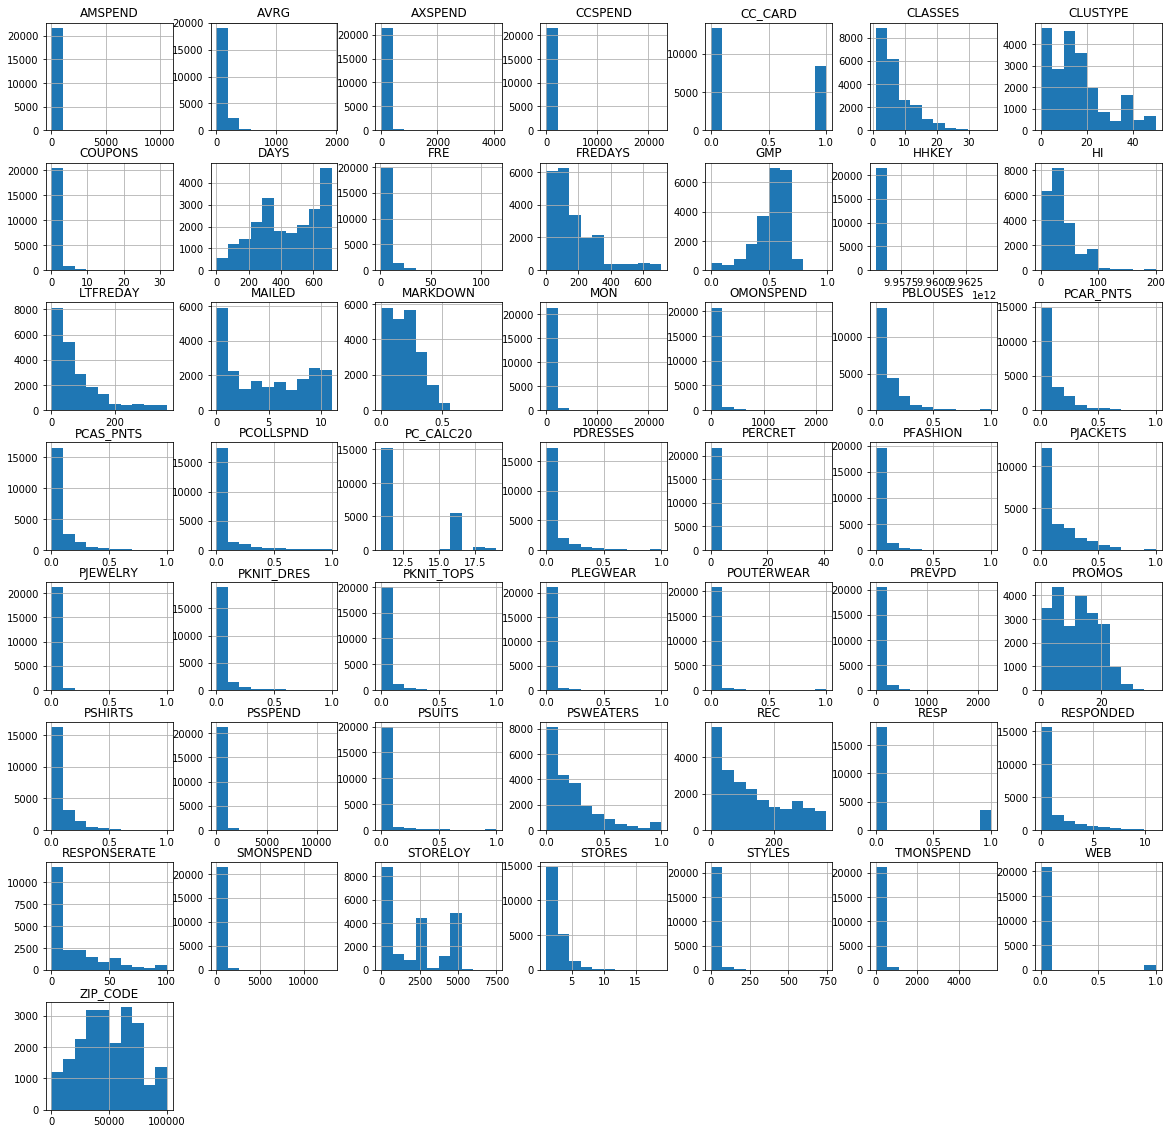

In [19]:
num_bins = 10
data.hist(bins=num_bins, figsize =(20,20))
plt.show()

In [20]:
# HISTOGRAM SHOWS PRESENCE OF OUTLIERS IN ["AMSPEND", "STYLES","TMONSPEND","SMONSPEND","PSSPEND","PREVPD","CCSPEND","AVRG","MON"]

In [21]:
# VALPHONE IS VATEGORICAL SO CONVERTED TO INTEGER

In [22]:
data = data.replace(to_replace=['N', 'Y'], value=[0, 1])
data['VALPHON'] = data['VALPHON'].astype(int)

In [23]:
data.head()

,HHKEY,ZIP_CODE,REC,FRE,MON,CC_CARD,AVRG,PC_CALC20,PSWEATERS,PKNIT_TOPS,...,VALPHON,WEB,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,CLUSTYPE,PERCRET,RESP
0,9955600066402,1001,208,2,368.46,0,184.23,11,0.18,0.00,...,0,0,5,0,0.00,31.81,111.00,10,0.00,0
1,9955600073501,1028,6,4,258.00,1,64.50,11,0.26,0.16,...,1,0,4,2,50.00,32.72,43.50,10,0.03,1
2,9955600076313,1056,327,2,77.00,0,38.50,11,1.00,0.00,...,0,0,4,0,0.00,100.00,68.60,16,0.00,0
3,9955600078045,1118,66,8,846.06,1,105.75,11,0.38,0.00,...,1,0,9,6,66.67,23.27,26.96,10,0.00,0
4,9955600078517,1107,49,1,87.44,0,87.44,11,0.20,0.20,...,1,0,0,0,0.00,28.52,24.50,20,0.00,0


In [24]:
 data = data.drop(columns=['HHKEY', 'ZIP_CODE'])

In [25]:
# BOX PLOT


# Through Box plot , will visualise outliers present in data 

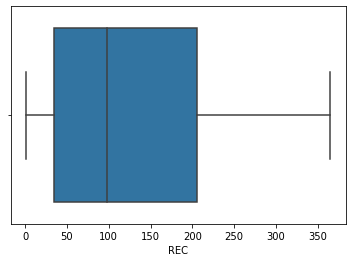

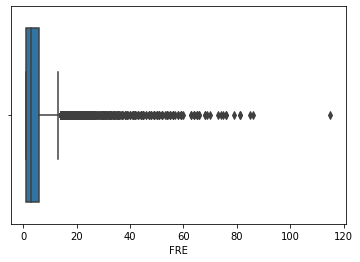

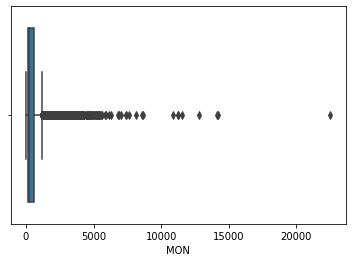

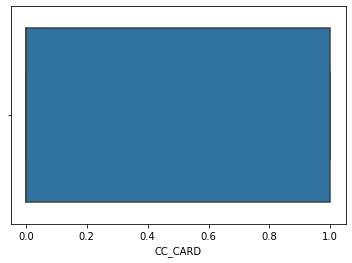

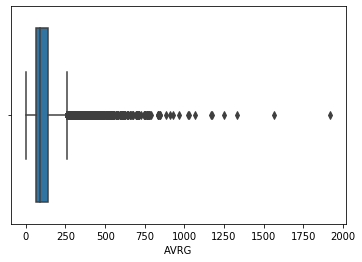

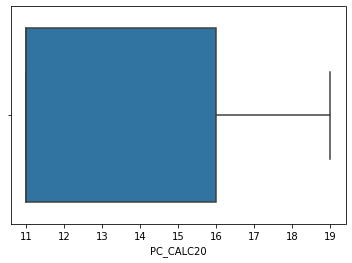

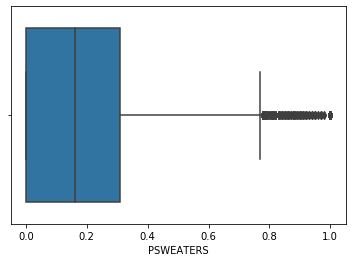

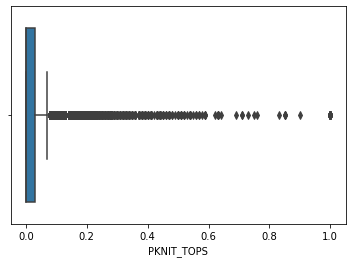

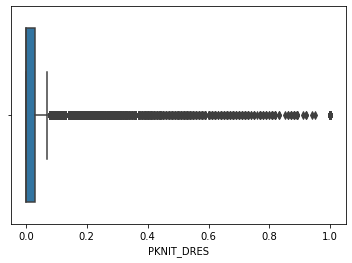

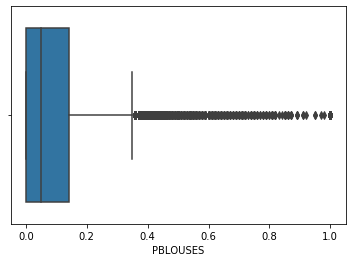

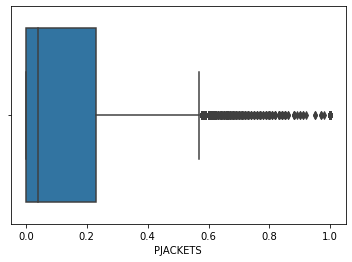

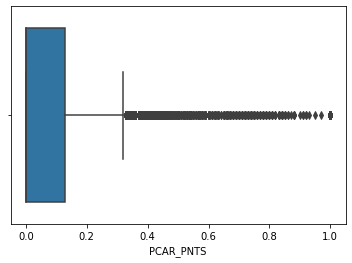

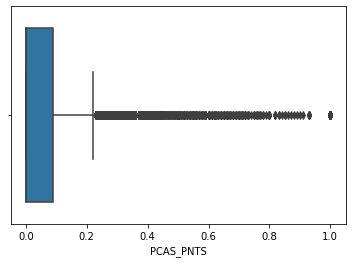

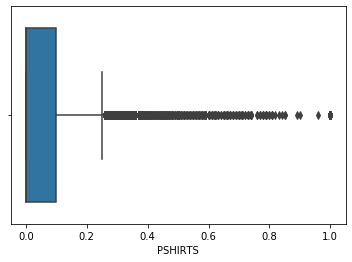

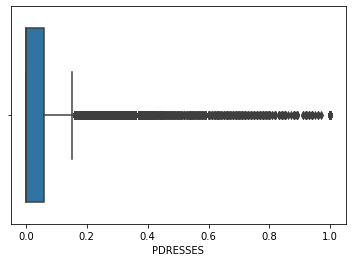

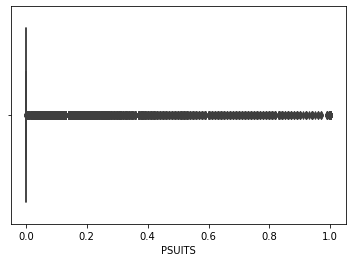

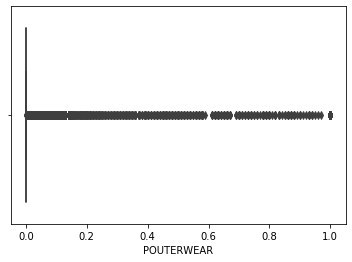

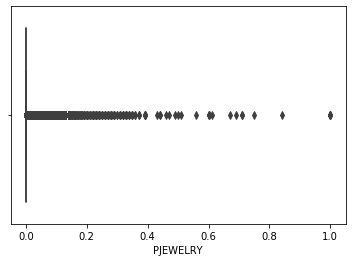

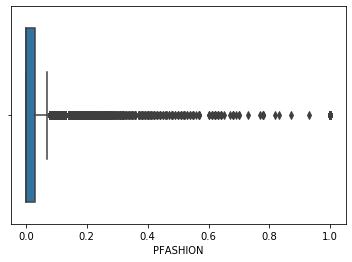

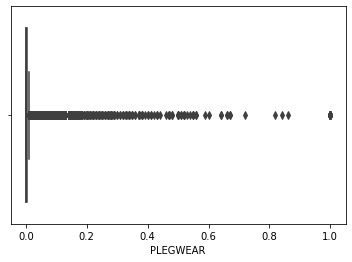

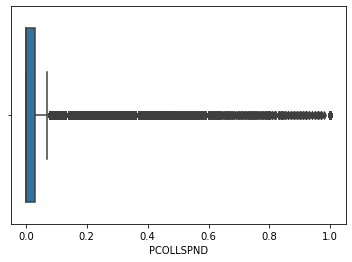

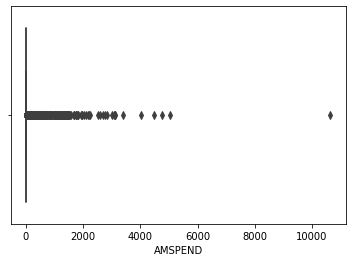

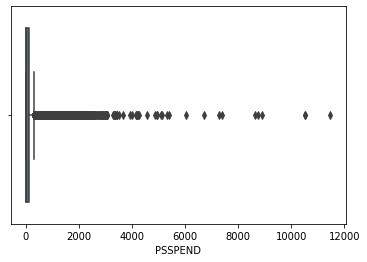

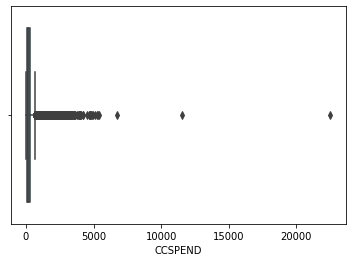

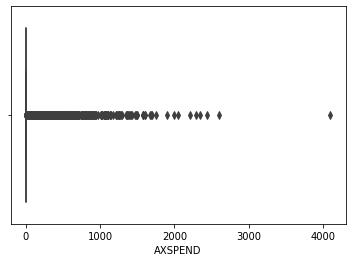

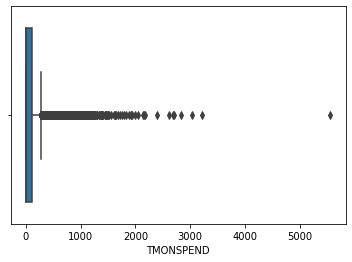

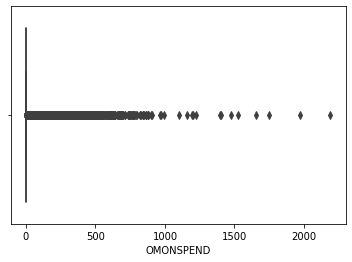

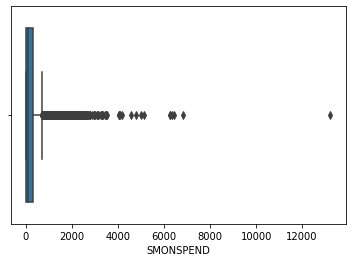

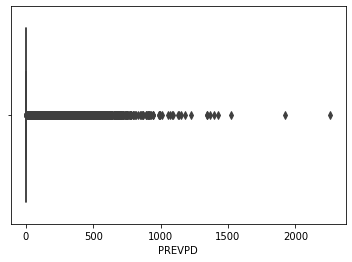

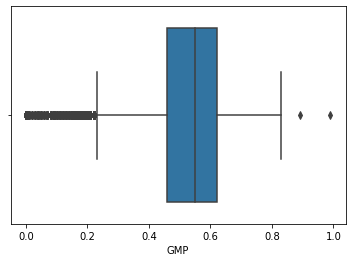

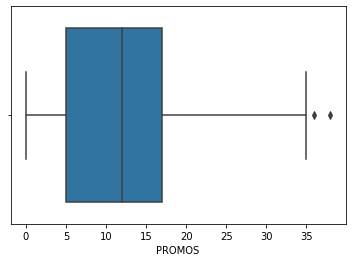

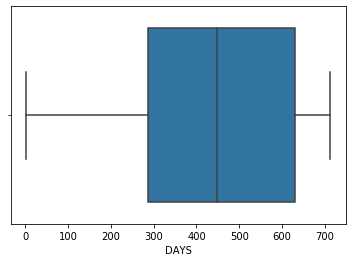

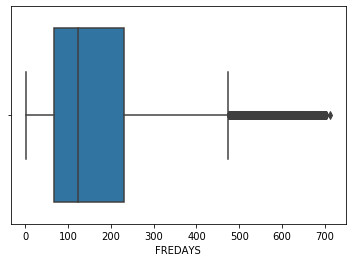

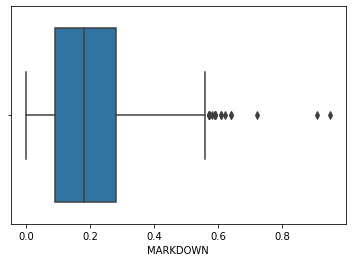

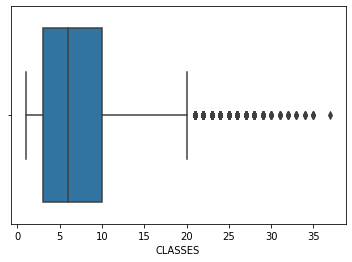

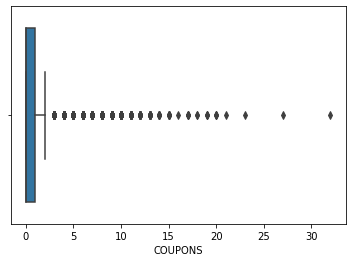

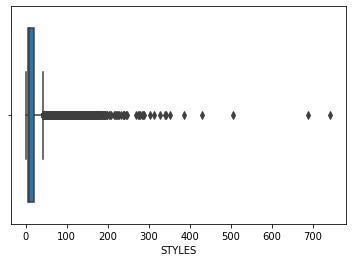

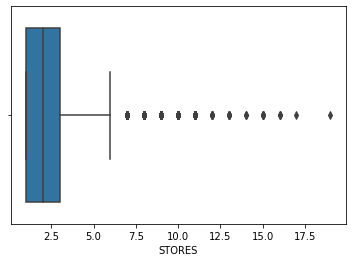

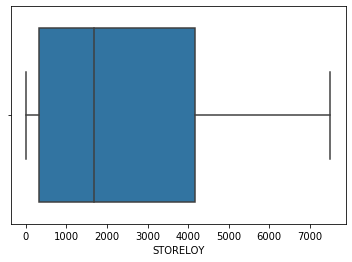

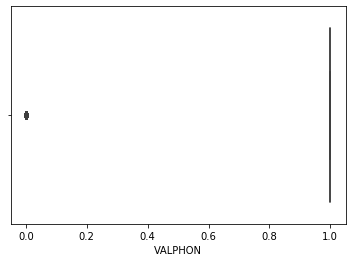

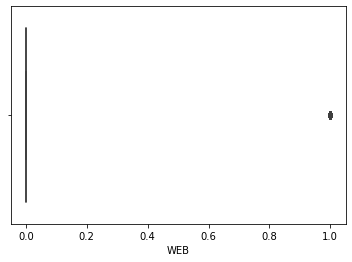

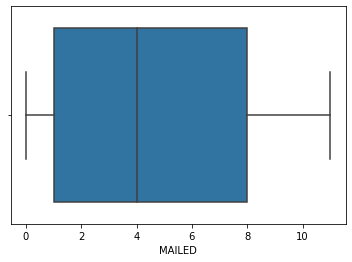

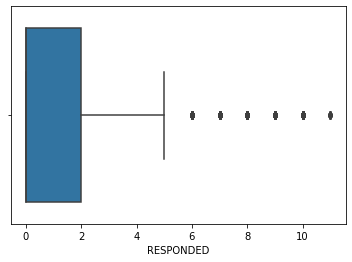

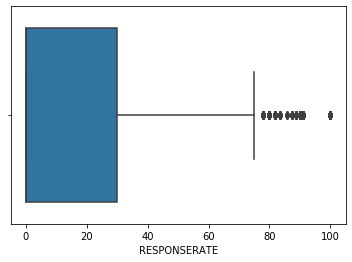

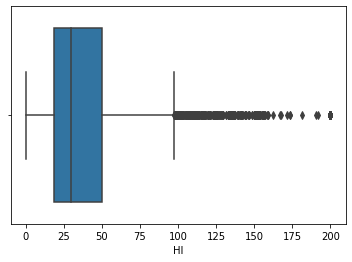

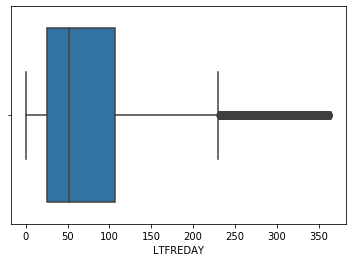

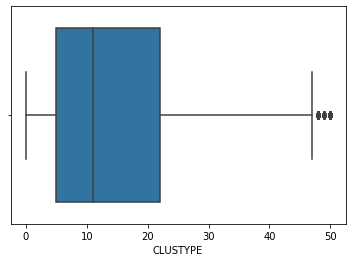

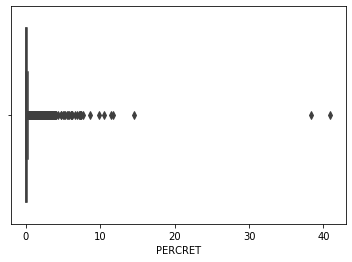

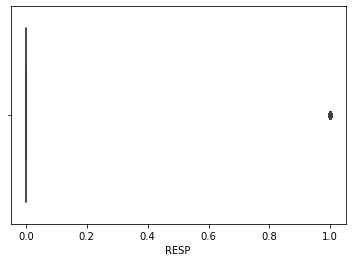

In [26]:
for column in data.columns[:]:  # Loop over all columns 
    
    
       sb.boxplot(data[column])
       plt.show()




    


In [27]:
# The Result of box plots show that the data containes enoormous amounts of outliers

In [28]:
z = np.abs(stats.zscore(data))
threshold = 3
print(np.where(z > 3))


# Using Z score to get columsn which have a Z score of more than 3

(array([    2,     4,     5, ..., 21734, 21735, 21737]), array([ 6, 17,  7, ...,  6,  8, 26]))


In [29]:
# Using Inter Quartile Formula to get Outliers

In [30]:
Q1 = data.quantile(0.25) # First Quartile
Q3 = data.quantile(0.75) # Last Quartile
IQR = Q3 - Q1
print(IQR)

REC              171.000000
FRE                5.000000
MON              433.395000
CC_CARD            1.000000
AVRG              78.515000
PC_CALC20          5.000000
PSWEATERS          0.310000
PKNIT_TOPS         0.030000
PKNIT_DRES         0.030000
PBLOUSES           0.140000
PJACKETS           0.230000
PCAR_PNTS          0.130000
PCAS_PNTS          0.090000
PSHIRTS            0.100000
PDRESSES           0.060000
PSUITS             0.000000
POUTERWEAR         0.000000
PJEWELRY           0.000000
PFASHION           0.030000
PLEGWEAR           0.003524
PCOLLSPND          0.030000
AMSPEND            0.000000
PSSPEND          127.937500
CCSPEND          243.942500
AXSPEND            0.000000
TMONSPEND        109.992500
OMONSPEND          0.000000
SMONSPEND        287.572500
PREVPD             0.000000
GMP                0.160000
PROMOS            12.000000
DAYS             343.000000
FREDAYS          163.000000
MARKDOWN           0.190000
CLASSES            7.000000
COUPONS            1

In [31]:
# USING FORMULA ( Q1 - 1.5 * IQR) ( False : No outlier , True : Outlier)

In [32]:
print(data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))

         REC    FRE    MON  CC_CARD   AVRG  PC_CALC20  PSWEATERS  PKNIT_TOPS  \
0      False  False  False    False  False      False      False       False   
1      False  False  False    False  False      False      False       False   
2      False  False  False    False  False      False      False       False   
3      False  False  False    False  False      False      False       False   
4      False  False  False    False  False      False      False       False   
5      False  False  False    False  False      False      False       False   
6      False  False  False    False  False      False      False       False   
7      False  False  False    False  False      False      False       False   
8      False  False  False    False  False      False      False       False   
9      False  False  False    False  False      False      False       False   
10     False  False  False    False  False      False      False       False   
11     False  False  False    False  Fal

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [33]:
data.shape

(21740, 49)

In [34]:
# REMOVING OUTLIERS

In [35]:
data_1 = data[(z < 3).all(axis=1)] 

# Using Z-Score elemination method to clean data



In [36]:
data_1.shape

(11366, 49)

In [37]:
data_1.head()

,REC,FRE,MON,CC_CARD,AVRG,PC_CALC20,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,...,VALPHON,WEB,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,CLUSTYPE,PERCRET,RESP
0,208,2,368.46,0,184.23,11,0.18,0.00,0.00,0.30,...,0,0,5,0,0.00,31.81,111.00,10,0.00,0
1,6,4,258.00,1,64.50,11,0.26,0.16,0.00,0.00,...,1,0,4,2,50.00,32.72,43.50,10,0.03,1
3,66,8,846.06,1,105.75,11,0.38,0.00,0.05,0.06,...,1,0,9,6,66.67,23.27,26.96,10,0.00,0
8,264,1,318.50,0,318.50,11,0.24,0.00,0.00,0.00,...,0,0,3,0,0.00,50.42,264.00,23,0.00,0
11,118,1,172.99,0,172.99,16,0.00,0.15,0.00,0.33,...,1,0,0,0,0.00,26.78,59.00,16,0.00,0


# Feature Engineering

In [38]:
# Using Feature Engineering/ Selction Techniques to reduce comlexity of data

In [39]:
# Univariate Feature Selection

X = data_1.iloc[:,0:-1]
Y = data_1.iloc[:, -1]



bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  
print(featureScores.nlargest(34,'Score'))  






         Feature          Score
2            MON  117993.605277
27     SMONSPEND   80961.589635
23       CCSPEND   57802.492575
22       PSSPEND   57405.099171
45      LTFREDAY   40777.460140
25     TMONSPEND   36512.707809
0            REC   28678.487577
32       FREDAYS   25937.186841
31          DAYS   15024.088686
26     OMONSPEND   12921.944188
43  RESPONSERATE   12574.724467
24       AXSPEND    8111.659390
28        PREVPD    8005.356071
36        STYLES    6960.754201
4           AVRG    4816.234197
1            FRE    2897.001693
38      STORELOY    2665.788638
44            HI    2270.055371
34       CLASSES    1326.811424
42     RESPONDED    1085.396419
30        PROMOS     919.487691
35       COUPONS     679.403395
41        MAILED     553.959304
37        STORES     211.804127
3        CC_CARD     181.279483
47       PERCRET      48.446022
21       AMSPEND      45.051310
46      CLUSTYPE      42.463433
39       VALPHON      11.463191
10      PJACKETS       5.652018
5      P

In [40]:
# we can see that the 15 variables of what pruchsed arent significant  so we remove them 

In [41]:
print(data.columns)

Index(['REC', 'FRE', 'MON', 'CC_CARD', 'AVRG', 'PC_CALC20', 'PSWEATERS',
       'PKNIT_TOPS', 'PKNIT_DRES', 'PBLOUSES', 'PJACKETS', 'PCAR_PNTS',
       'PCAS_PNTS', 'PSHIRTS', 'PDRESSES', 'PSUITS', 'POUTERWEAR', 'PJEWELRY',
       'PFASHION', 'PLEGWEAR', 'PCOLLSPND', 'AMSPEND', 'PSSPEND', 'CCSPEND',
       'AXSPEND', 'TMONSPEND', 'OMONSPEND', 'SMONSPEND', 'PREVPD', 'GMP',
       'PROMOS', 'DAYS', 'FREDAYS', 'MARKDOWN', 'CLASSES', 'COUPONS', 'STYLES',
       'STORES', 'STORELOY', 'VALPHON', 'WEB', 'MAILED', 'RESPONDED',
       'RESPONSERATE', 'HI', 'LTFREDAY', 'CLUSTYPE', 'PERCRET', 'RESP'],
      dtype='object')


In [42]:
 data_1 = data_1.drop(columns=['PSWEATERS',
       'PKNIT_TOPS', 'PKNIT_DRES', 'PBLOUSES', 'PJACKETS', 'PCAR_PNTS',
       'PCAS_PNTS', 'PSHIRTS', 'PDRESSES', 'PSUITS', 'POUTERWEAR', 'PJEWELRY',
       'PFASHION', 'PLEGWEAR', 'PCOLLSPND'])

In [43]:
data_1.head()

,REC,FRE,MON,CC_CARD,AVRG,PC_CALC20,AMSPEND,PSSPEND,CCSPEND,AXSPEND,...,VALPHON,WEB,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,CLUSTYPE,PERCRET,RESP
0,208,2,368.46,0,184.23,11,0.0,0.00,368.46,0.0,...,0,0,5,0,0.00,31.81,111.00,10,0.00,0
1,6,4,258.00,1,64.50,11,0.0,0.00,258.00,0.0,...,1,0,4,2,50.00,32.72,43.50,10,0.03,1
3,66,8,846.06,1,105.75,11,0.0,0.00,846.06,0.0,...,1,0,9,6,66.67,23.27,26.96,10,0.00,0
8,264,1,318.50,0,318.50,11,0.0,0.00,318.50,0.0,...,0,0,3,0,0.00,50.42,264.00,23,0.00,0
11,118,1,172.99,0,172.99,16,0.0,160.99,12.00,0.0,...,1,0,0,0,0.00,26.78,59.00,16,0.00,0


In [44]:
# Checking Class Imbalance before RFE

(array([0, 1]), <a list of 2 Text xticklabel objects>)

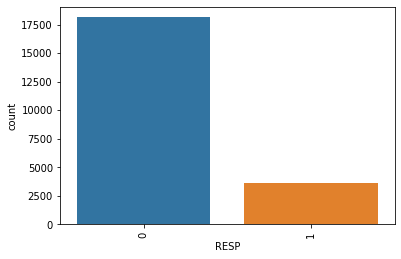

In [45]:
data_1['RESP'].value_counts()
    
sb.countplot(x='RESP', data=data)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

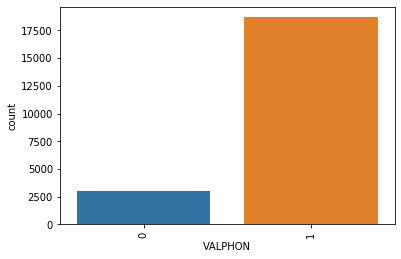

In [46]:
data_1['VALPHON'].value_counts()
sb.countplot(x='VALPHON', data=data)
plt.xticks(rotation=90)



# Bar Chart shows existence of class imbalance , more 0's 

(array([0, 1]), <a list of 2 Text xticklabel objects>)

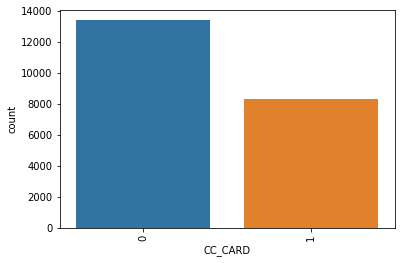

In [47]:
data_1['CC_CARD'].value_counts()
sb.countplot(x='CC_CARD', data=data)
plt.xticks(rotation=90)

In [48]:
# Bar Charts show that there are a higher number of 1's

In [49]:
X = data_1.iloc[:,0:-1]
Y = data_1.iloc[:, -1]

In [50]:
X.columns[:]

Index(['REC', 'FRE', 'MON', 'CC_CARD', 'AVRG', 'PC_CALC20', 'AMSPEND',
       'PSSPEND', 'CCSPEND', 'AXSPEND', 'TMONSPEND', 'OMONSPEND', 'SMONSPEND',
       'PREVPD', 'GMP', 'PROMOS', 'DAYS', 'FREDAYS', 'MARKDOWN', 'CLASSES',
       'COUPONS', 'STYLES', 'STORES', 'STORELOY', 'VALPHON', 'WEB', 'MAILED',
       'RESPONDED', 'RESPONSERATE', 'HI', 'LTFREDAY', 'CLUSTYPE', 'PERCRET'],
      dtype='object')

In [51]:
data_1.shape

(11366, 34)

In [52]:
data_1.head()

,REC,FRE,MON,CC_CARD,AVRG,PC_CALC20,AMSPEND,PSSPEND,CCSPEND,AXSPEND,...,VALPHON,WEB,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,CLUSTYPE,PERCRET,RESP
0,208,2,368.46,0,184.23,11,0.0,0.00,368.46,0.0,...,0,0,5,0,0.00,31.81,111.00,10,0.00,0
1,6,4,258.00,1,64.50,11,0.0,0.00,258.00,0.0,...,1,0,4,2,50.00,32.72,43.50,10,0.03,1
3,66,8,846.06,1,105.75,11,0.0,0.00,846.06,0.0,...,1,0,9,6,66.67,23.27,26.96,10,0.00,0
8,264,1,318.50,0,318.50,11,0.0,0.00,318.50,0.0,...,0,0,3,0,0.00,50.42,264.00,23,0.00,0
11,118,1,172.99,0,172.99,16,0.0,160.99,12.00,0.0,...,1,0,0,0,0.00,26.78,59.00,16,0.00,0


In [53]:
# RFE with Linear Regression





lr = LinearRegression()

rfe = RFE(lr, n_features_to_select=1)
rfe.fit(X,Y)
 
print("Features sorted by their rank:")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), data_1.columns)))

Features sorted by their rank:
[(1, 'MARKDOWN'), (2, 'CC_CARD'), (3, 'GMP'), (4, 'VALPHON'), (5, 'FRE'), (6, 'PERCRET'), (7, 'COUPONS'), (8, 'CLASSES'), (9, 'STYLES'), (10, 'RESPONDED'), (11, 'STORES'), (12, 'PC_CALC20'), (13, 'LTFREDAY'), (14, 'PROMOS'), (15, 'MAILED'), (16, 'RESPONSERATE'), (17, 'CCSPEND'), (18, 'AMSPEND'), (19, 'PSSPEND'), (20, 'MON'), (21, 'AXSPEND'), (22, 'FREDAYS'), (23, 'CLUSTYPE'), (24, 'HI'), (25, 'TMONSPEND'), (26, 'AVRG'), (27, 'DAYS'), (28, 'PREVPD'), (29, 'REC'), (30, 'SMONSPEND'), (31, 'OMONSPEND'), (32, 'STORELOY'), (33, 'WEB')]


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


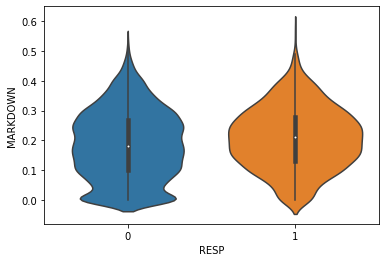

In [54]:
# plotting violin plots for majore features

sb.violinplot(data_1["RESP"],data_1["MARKDOWN"])
    
    
   

In [55]:
# MARKDOWN has slighlity more values corr with RESP[1] distribution with RESP

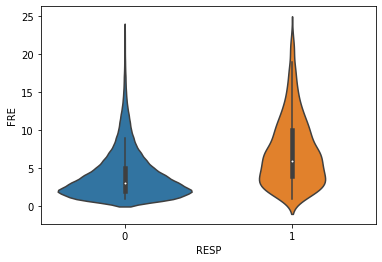

In [56]:
sb.violinplot(data_1["RESP"],data_1["FRE"])


In [57]:
# FRE has more values corresponding to 0 of RESP between 0-5

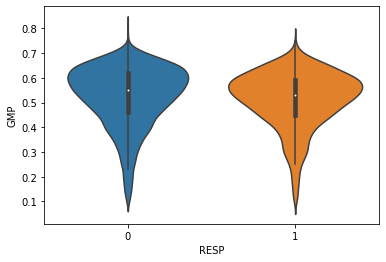

In [58]:
sb.violinplot(data_1["RESP"],data_1["GMP"])


In [59]:
# GMP is evenly related to both 1 and 0 of RESP

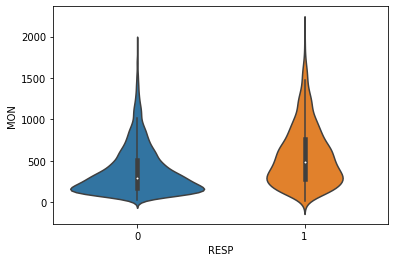

In [60]:
sb.violinplot(data_1["RESP"],data_1["MON"])


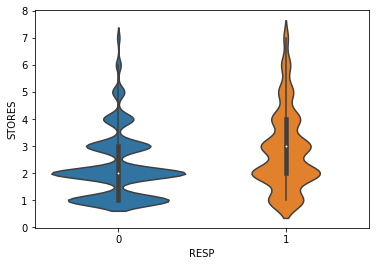

In [61]:
sb.violinplot(data_1["RESP"],data_1["STORES"])


In [62]:
# store has a more normal distribution with RESP of 1

In [63]:


# EXTRA GOLDEN FEATURE SELECTION 

import operator

individual_features_df = []
for i in range(0, len(data_1.columns) - 1): # -1 because the last column is 
    tmpDf = data_1[[data_1.columns[i], 'RESP']]
    tmpDf = tmpDf[tmpDf[data_1.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['RESP'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

       LTFREDAY: -0.2688199131344455
            REC: -0.1835201868908816
        FREDAYS: -0.17004780387400376
             HI: -0.1608299756255435
           AVRG: -0.10271351444180622
        AMSPEND: -0.06777836047874677
            GMP: -0.035891870081502894
      OMONSPEND: -0.02966874444499553
       CLUSTYPE: -0.019922612239933184
        PERCRET: -0.017292928187978472
         PREVPD: 0.00266193167533295
       STORELOY: 0.01268080461933209
        AXSPEND: 0.02461929492615774
      PC_CALC20: 0.03074338455413124
       MARKDOWN: 0.04085001407741495
      TMONSPEND: 0.0679144951400862
        COUPONS: 0.12094139011637395
        PSSPEND: 0.1254575999607384
         MAILED: 0.12767711718243388
           DAYS: 0.12996444722626765
      SMONSPEND: 0.1399635622209803
        CCSPEND: 0.14008252959582262
         PROMOS: 0.14432118645602357
   RESPONSERATE: 0.1592735057069049
         STORES: 0.16540517270123414
      RESPONDED: 0.1707525691021138
            MON: 0.21452510066145

In [64]:
golden_features_list = [key for key, value in all_correlations if abs(value) >= 0.4]


## Heat Map with Correlation 

In [65]:
corr = data_1.corr()

In [66]:
corr[np.abs(corr)<.4] = 0

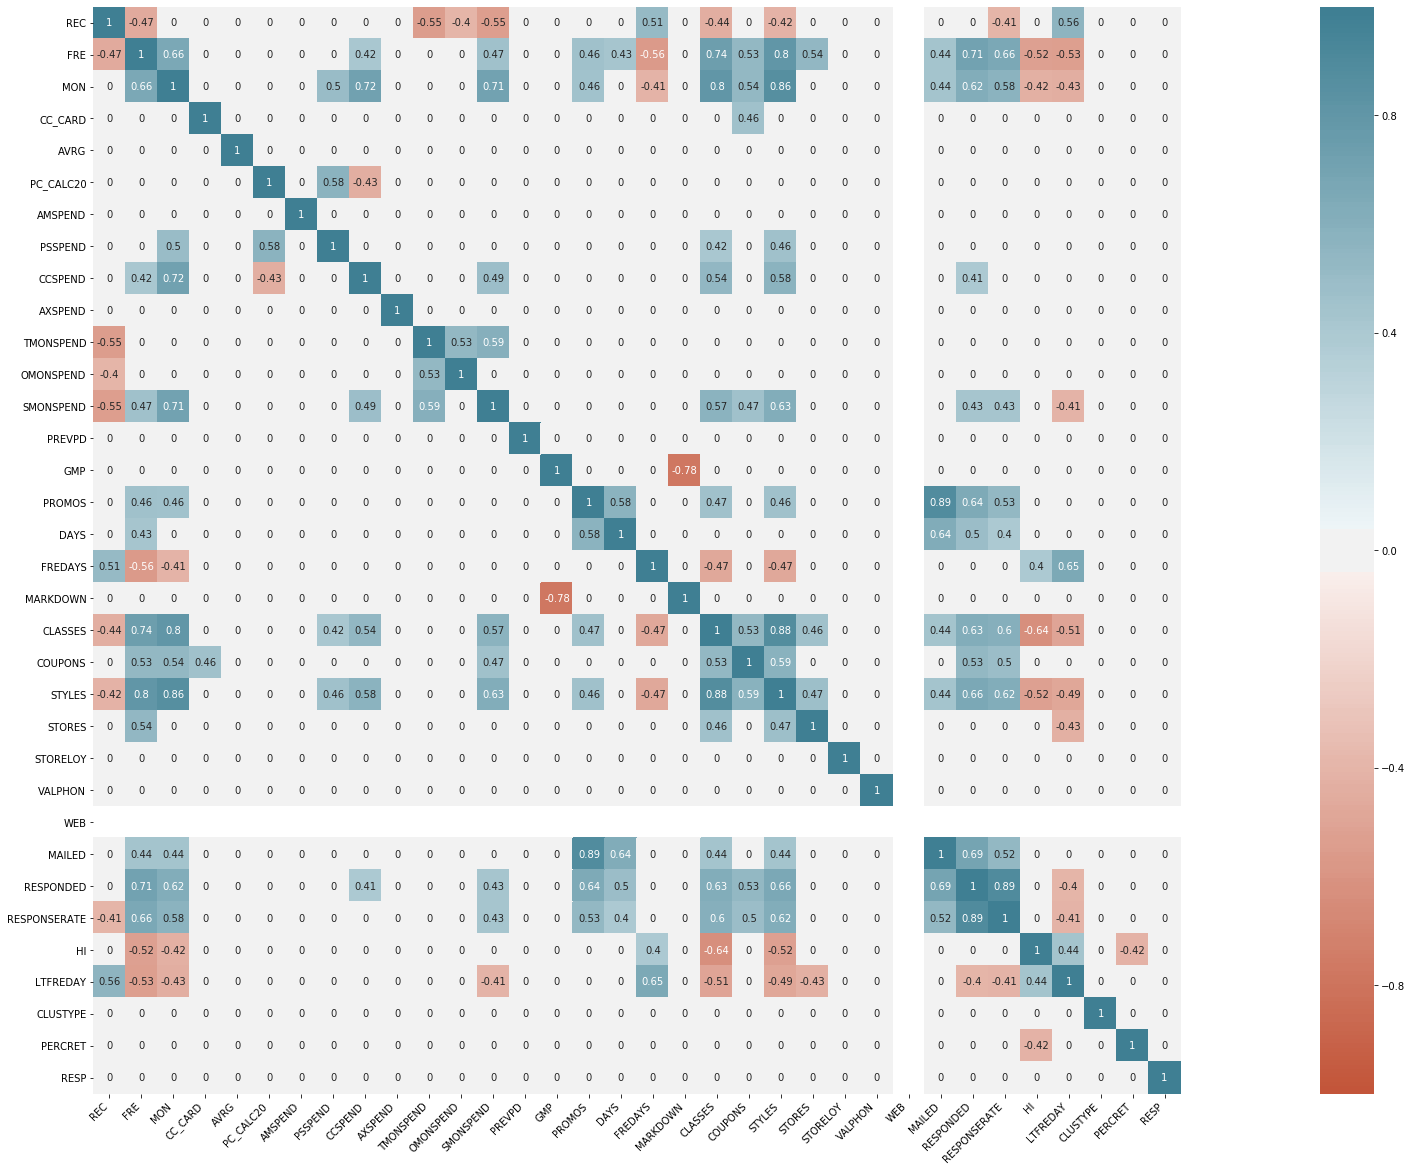

In [67]:

plt.figure(figsize = (50,20))

ax = sb.heatmap(corr, vmin=-1, vmax=1,center=0, cmap=sb.diverging_palette(20, 220 , n = 300), square = True, annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right');

In [68]:
# Heat map has removed (converted to zero those values whhc have corr less than 0.4)

In [69]:
data_1 = data_1.drop(columns=["AVRG","PERCRET","CLUSTYPE","AXSPEND" , "WEB" ])

In [70]:
data_1.head()

,REC,FRE,MON,CC_CARD,PC_CALC20,AMSPEND,PSSPEND,CCSPEND,TMONSPEND,OMONSPEND,...,STYLES,STORES,STORELOY,VALPHON,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,RESP
0,208,2,368.46,0,11,0.0,0.00,368.46,0.00,0.00,...,11,1,7,0,5,0,0.00,31.81,111.00,0
1,6,4,258.00,1,11,0.0,0.00,258.00,138.00,55.99,...,14,1,7,1,4,2,50.00,32.72,43.50,1
3,66,8,846.06,1,11,0.0,0.00,846.06,104.94,0.00,...,35,1,7,1,9,6,66.67,23.27,26.96,0
8,264,1,318.50,0,11,0.0,0.00,318.50,0.00,0.00,...,6,1,7,0,3,0,0.00,50.42,264.00,0
11,118,1,172.99,0,16,0.0,160.99,12.00,0.00,0.00,...,5,2,2869,1,0,0,0.00,26.78,59.00,0


In [71]:
# Examiing Distributions of some features

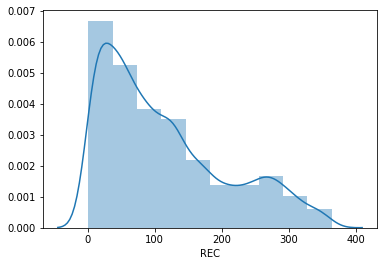

In [72]:
sb.distplot(data_1["REC"], bins= 10)

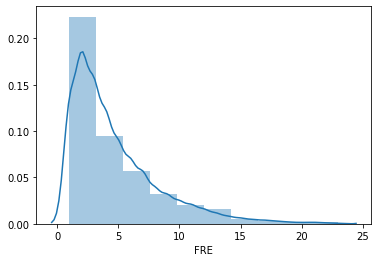

In [73]:
sb.distplot(data_1["FRE"], bins= 10)

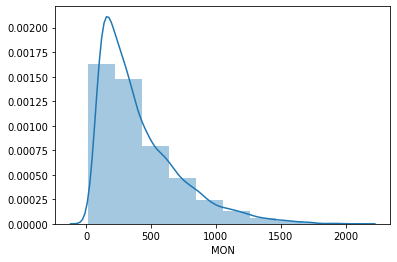

In [74]:
sb.distplot(data_1["MON"], bins= 10)

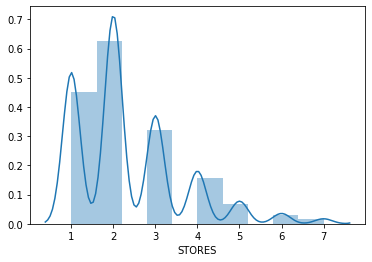

In [75]:
sb.distplot(data_1["STORES"], bins= 10)

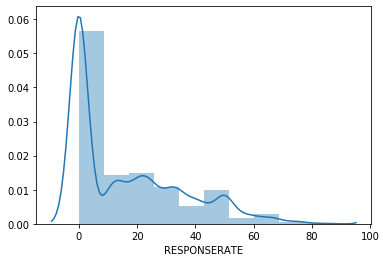

In [76]:
sb.distplot(data_1["RESPONSERATE"], bins= 10)

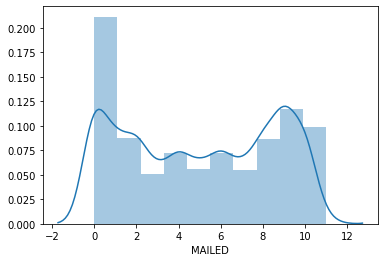

In [77]:
sb.distplot(data_1["MAILED"], bins= 10)

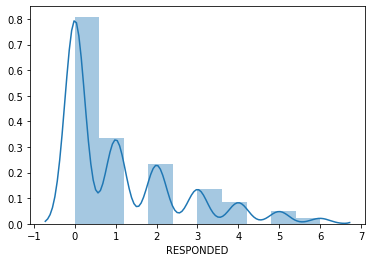

In [78]:
sb.distplot(data_1["RESPONDED"], bins= 10)

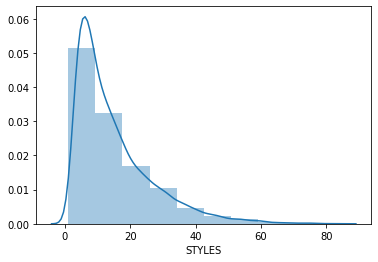

In [79]:
sb.distplot(data_1["STYLES"], bins= 10)

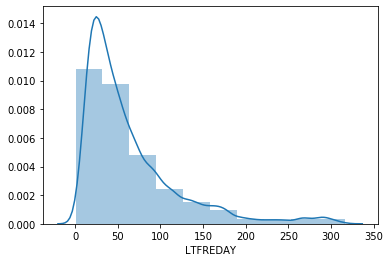

In [80]:
sb.distplot(data_1["LTFREDAY"], bins= 10)

In [81]:
'''


By examiing the distribution plots , it is observed that most of the features have either right skewed distribtuions or either 
bi-modal distributions or X-model , essencially there is no normal distribution.

'''

'\n\n\nBy examiing the distribution plots , it is observed that most of the features have either right skewed distribtuions or either \nbi-modal distributions or X-model , essencially there is no normal distribution.\n\n'

In [82]:
# Using piecharts to visualise cat vars

In [83]:
data_1.head()

,REC,FRE,MON,CC_CARD,PC_CALC20,AMSPEND,PSSPEND,CCSPEND,TMONSPEND,OMONSPEND,...,STYLES,STORES,STORELOY,VALPHON,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,RESP
0,208,2,368.46,0,11,0.0,0.00,368.46,0.00,0.00,...,11,1,7,0,5,0,0.00,31.81,111.00,0
1,6,4,258.00,1,11,0.0,0.00,258.00,138.00,55.99,...,14,1,7,1,4,2,50.00,32.72,43.50,1
3,66,8,846.06,1,11,0.0,0.00,846.06,104.94,0.00,...,35,1,7,1,9,6,66.67,23.27,26.96,0
8,264,1,318.50,0,11,0.0,0.00,318.50,0.00,0.00,...,6,1,7,0,3,0,0.00,50.42,264.00,0
11,118,1,172.99,0,16,0.0,160.99,12.00,0.00,0.00,...,5,2,2869,1,0,0,0.00,26.78,59.00,0


In [84]:
X = data_1.iloc[:, 0:-1]
Y = data_1.iloc[: , -1]

# Starting Principal Component Analysis

#### Normalising Data 

In [85]:
data_norm = (data_1 - data_1.min()) / (data_1.max() - data_1.min())
data_norm.head()

,REC,FRE,MON,CC_CARD,PC_CALC20,AMSPEND,PSSPEND,CCSPEND,TMONSPEND,OMONSPEND,...,STYLES,STORES,STORELOY,VALPHON,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,RESP
0,0.570248,0.045455,0.169105,0.0,0.000,0.0,0.000000,0.229154,0.000000,0.000000,...,0.120482,0.000000,0.000555,0.0,0.454545,0.000000,0.000000,0.307051,0.350320,0.0
1,0.013774,0.136364,0.115655,1.0,0.000,0.0,0.000000,0.160455,0.215973,0.173344,...,0.156627,0.000000,0.000555,1.0,0.363636,0.333333,0.583363,0.316418,0.136401,1.0
3,0.179063,0.318182,0.400212,1.0,0.000,0.0,0.000000,0.526193,0.164233,0.000000,...,0.409639,0.000000,0.000555,1.0,0.818182,1.000000,0.777856,0.219146,0.083983,0.0
8,0.724518,0.000000,0.144930,0.0,0.000,0.0,0.000000,0.198082,0.000000,0.000000,...,0.060241,0.000000,0.000555,0.0,0.272727,0.000000,0.000000,0.498610,0.835203,0.0
11,0.322314,0.000000,0.074519,0.0,0.625,0.0,0.120884,0.007457,0.000000,0.000000,...,0.048193,0.166667,0.397890,1.0,0.000000,0.000000,0.000000,0.255275,0.185523,0.0


In [86]:

pca = PCA()
pca.fit(X)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [87]:
pca.n_components_

28

In [88]:
components_applied = DataFrame(pca.transform(X))
components_applied.columns = [column for column in components_applied.columns]
components_applied.round(2).head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-2161.49,-81.29,-136.86,-319.32,66.74,83.23,-49.95,-53.21,13.06,-8.40,...,-1.52,1.91,2.34,-0.98,0.57,0.07,0.99,0.55,-0.11,0.02
1,-2157.86,-54.45,-20.21,-178.36,-290.26,-53.33,1.78,-11.94,16.13,2.71,...,-1.50,-2.44,2.76,-1.14,-0.90,0.38,-0.63,0.21,0.01,-0.11
2,-2162.68,707.42,-307.36,-178.70,-22.52,-48.72,26.20,98.77,-4.39,-33.09,...,-1.05,-0.38,1.52,-1.78,1.31,-1.42,0.19,0.08,0.04,0.03
3,-2162.30,-211.72,-154.00,49.52,207.40,161.07,-73.68,-31.79,5.57,13.75,...,0.29,1.52,1.70,-0.14,-0.09,-0.09,0.36,0.58,-0.10,-0.03
4,706.57,-356.37,111.26,301.70,41.60,28.79,66.66,2.64,34.44,-2.82,...,2.01,-0.40,0.42,0.11,-0.14,-0.54,0.11,-0.23,-0.16,0.01


In [89]:
# Plottimg Distribution Plots 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


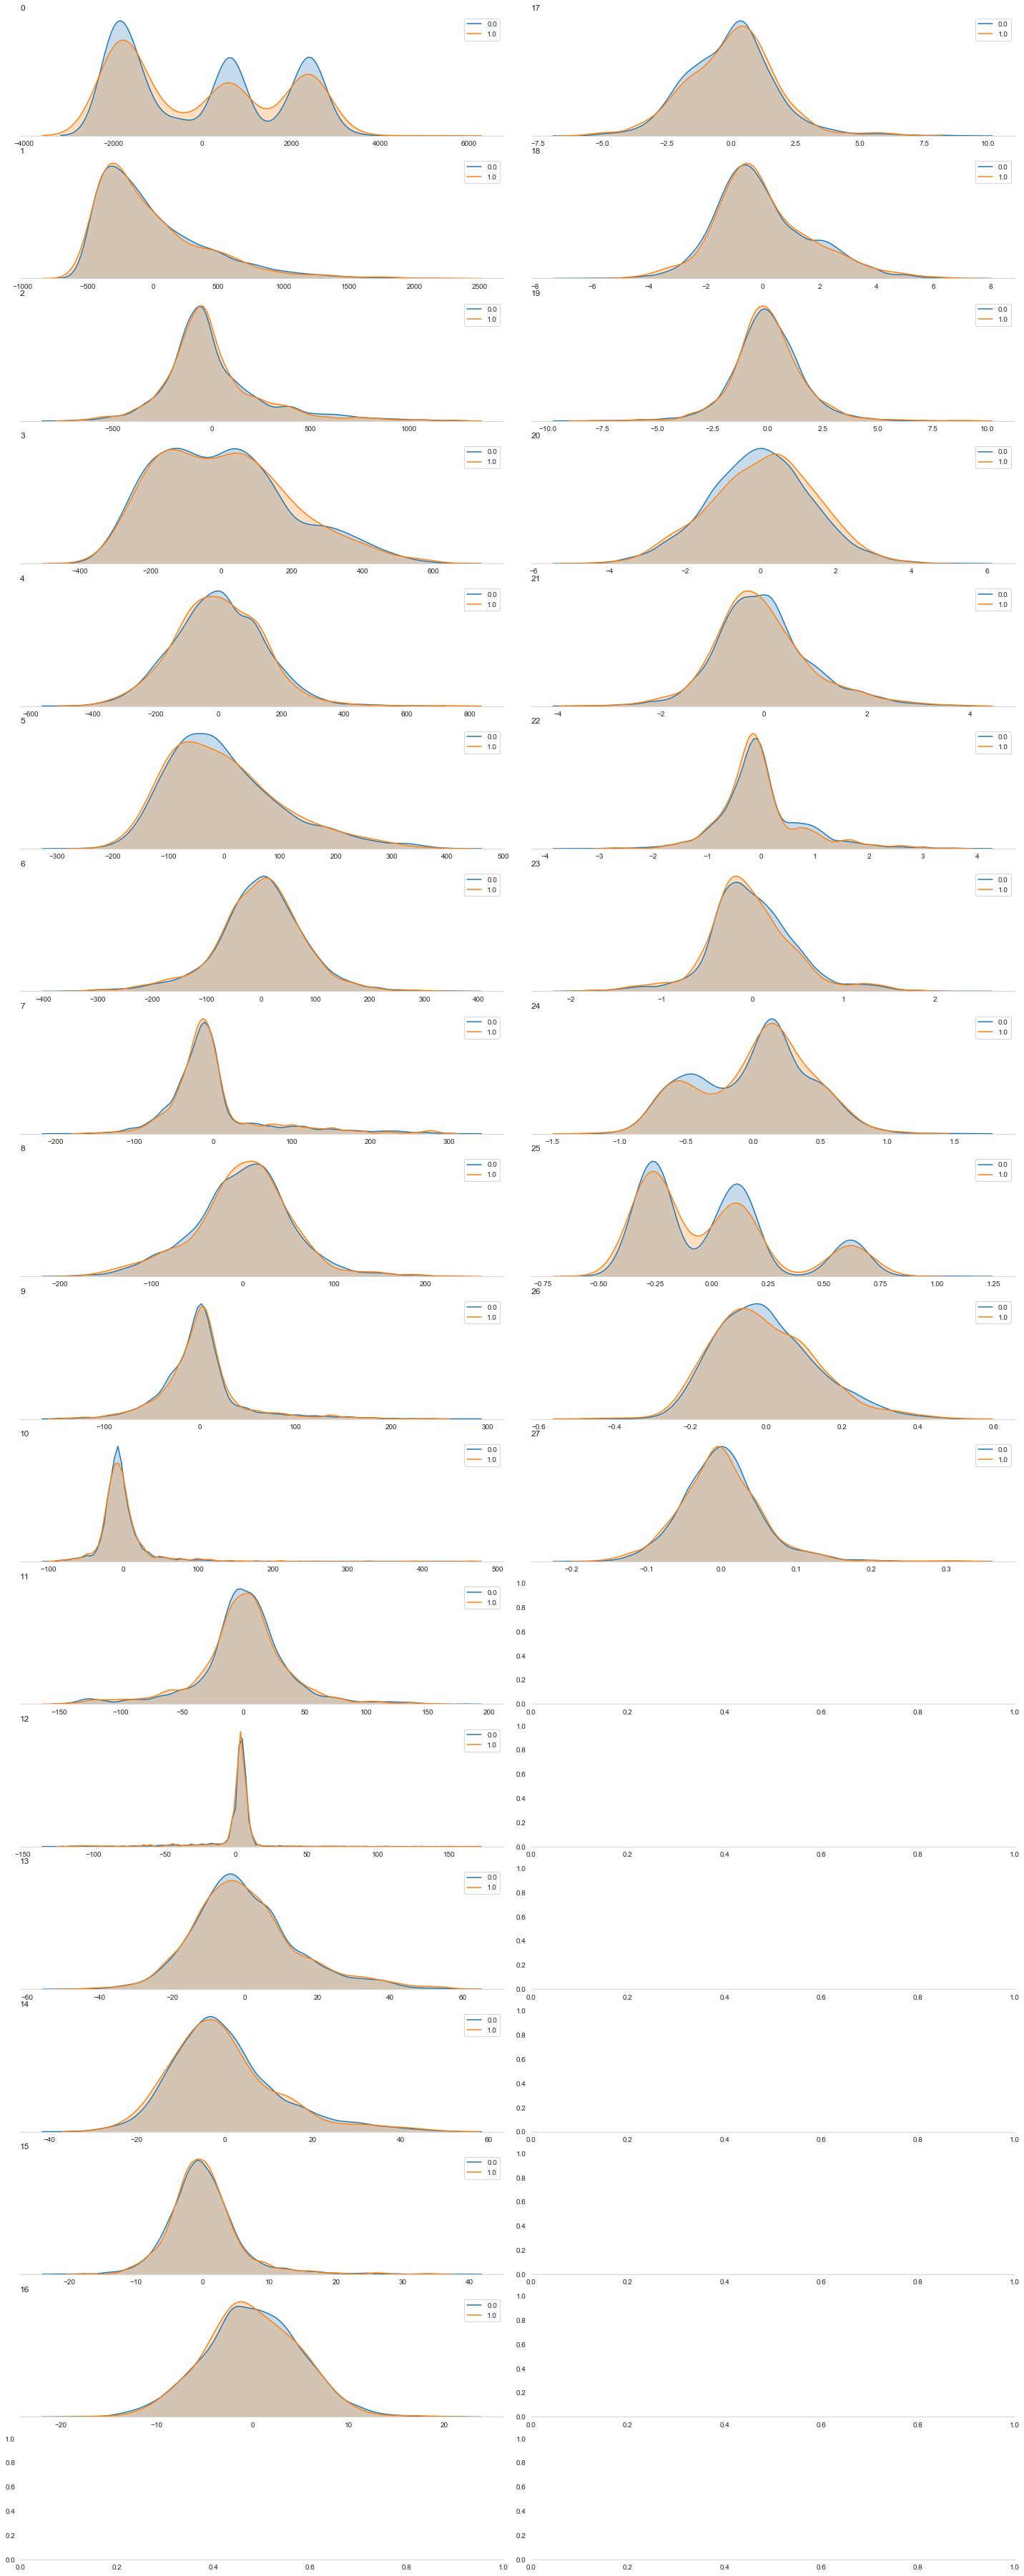

In [90]:


set_style("whitegrid")
set_style({"axes.grid":False})

for_plotting = components_applied.copy()
for_plotting["RESP"] = Y

n = 34
fig, axes = subplots(18,2, figsize=(20,50))
fig.tight_layout()
i = 0
j = 0


for p in components_applied.columns:
    
    for t in for_plotting["RESP"].unique():
        data_by_type = for_plotting[for_plotting["RESP"] == t]
        kdeplot(Series(data_by_type[p], name = t), shade=True, ax=axes[i][j])
        #distplot(Series(data_by_type[p], name = t), kde=False, ax=axes[i][j])
        axes[i][j].set_title(p, loc="left")
        axes[i][j].set_xlabel("",visible=False)
        axes[i][j].set_yticklabels([],visible=False)
        despine(left=True)
    i += 1
    
    if(i == n/2):
        i = 0
        j += 1
    
show()

In [91]:
# USING PCA TO REDUCE FEATURES 

In [92]:




pca = PCA()
principal_components = pca.fit_transform(data)
principal_df = pd.DataFrame(data = data_1)


In [93]:
principal_df.shape

(11366, 29)

# Model Testing and Evaluation (Train Data)

In [94]:
# Splitting Data into Test and Train 

In [95]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(9092, 28) (9092,)
(2274, 28) (2274,)


In [96]:
'''


I will use three algorithms for classification :



1. Logistic Regression
2. RandomForest
3. KNN


Round 1 : Without fixing class imbalance

Round 2 : With fixed class imbalance


'''

'\n\n\nI will use three algorithms for classification :\n\n\n\n1. Logistic Regression\n2. RandomForest\n3. KNN\n\n\nRound 1 : Without fixing class imbalance\n\nRound 2 : With fixed class imbalance\n\n\n'

### Logistic Regression Round 1

In [97]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [98]:
y_pred = log_reg.predict(X_test)
print('Accuracy of logistic regression classifier is : {:.2f}'.format(log_reg.score(X_test, y_test)))

Accuracy of logistic regression classifier is : 0.84


In [99]:

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.85      0.99      0.91      1917
          1       0.53      0.08      0.14       357

avg / total       0.80      0.84      0.79      2274



In [100]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1891   26]
 [ 328   29]]


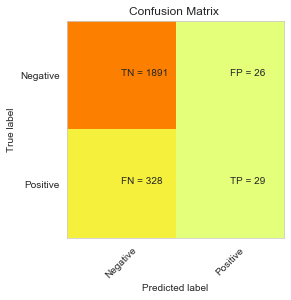

In [101]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title( 'Confusion Matrix ')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()


### RandomForest Round 1

In [102]:
ran_for = RandomForestClassifier(n_estimators=50, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
ran_for.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [103]:
print(ran_for.score(X_test, y_test))

0.841688654353562


### K Nearesr Neighbour Round 1

In [104]:
root_mean_sqr_err = [] 

for K in range(10):
    K = K+1
    knn_model = neighbors.KNeighborsRegressor(n_neighbors = K)

    knn_model.fit(X_train, y_train)  
    prediction = knn_model.predict(X_test) 
    error = sqrt(mean_squared_error(y_test,prediction)) 
    root_mean_sqr_err.append(error)
   

In [105]:
## Plotting Elbow Curve

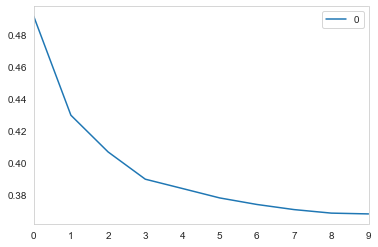

In [106]:

elb_curv = pd.DataFrame(root_mean_sqr_err) 
elb_curv.plot()

In [107]:
# K = 3 is ideal

In [108]:
from sklearn.neighbors import KNeighborsClassifier


knn_1 = KNeighborsClassifier(n_neighbors=3)
knn_1.fit(X_train, y_train)
y_pred = knn_1.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred))

0.8829740431148262


In [109]:
# With class imbalance accuracy of 3 models is 85%

## Resampling Data Set

In [110]:
# Using SMOTE over sampling minority class

In [111]:


smote = SMOTE(random_state = 2) 
X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train.ravel()) 
  

print("After OverSampling, counts of label '1': {}".format(sum(y_train_sm == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_sm == 0))) 

After OverSampling, counts of label '1': 7646
After OverSampling, counts of label '0': 7646


## Logistic Regression Round 2

In [112]:

sc = StandardScaler()
X_train_sm = sc.fit_transform(X_train_sm)
X_test = sc.transform(X_test)




log_reg_2 = LogisticRegression()
log_reg_2.fit(X_train_sm, y_train_sm)
y_pred_log = log_reg_2.predict(X_train_sm)

In [113]:

print('Accuracy of logistic regression classifier is : {:.2f}'.format(log_reg_2.score(X_train_sm, y_train_sm)))

Accuracy of logistic regression classifier is : 0.74


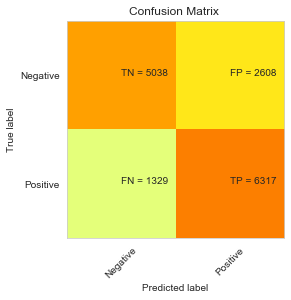

In [114]:


cm = confusion_matrix(y_train_sm, y_pred_log)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title( 'Confusion Matrix ')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [116]:

print(classification_report(y_train_sm, y_pred_log))

             precision    recall  f1-score   support

          0       0.79      0.66      0.72      7646
          1       0.71      0.83      0.76      7646

avg / total       0.75      0.74      0.74     15292



## Random Forest Round 2

In [117]:
ran_for_2 = RandomForestClassifier(n_estimators=50, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
ran_for_2.fit(X_train_sm, y_train_sm)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [118]:
y_pred_rf = ran_for_2.predict(X_train_sm)


print(ran_for_2.score(X_train_sm, y_train_sm))

0.9998692126602144


In [119]:
print(classification_report(y_train_sm, y_pred_rf))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      7646
          1       1.00      1.00      1.00      7646

avg / total       1.00      1.00      1.00     15292



## KNN Round 2

In [120]:

knn_2 = KNeighborsClassifier(n_neighbors=4)
knn_2.fit(X_train_sm, y_train_sm)
y_pred = knn_2.predict(X_train_sm)
print(metrics.accuracy_score(y_train_sm, y_pred))




0.9190426366727701


In [121]:


print(confusion_matrix(y_train_sm,y_pred))
print(classification_report(y_train_sm,y_pred))

[[6521 1125]
 [ 113 7533]]
             precision    recall  f1-score   support

          0       0.98      0.85      0.91      7646
          1       0.87      0.99      0.92      7646

avg / total       0.93      0.92      0.92     15292



In [122]:
'''

ON THE TEST DATA : 


LOGSTIC GIVES 76% 
RANDOM FOREST GIVES 100%
KNN GIVES 92%




'''

'\n\nON THE TEST DATA : \n\n\nLOGSTIC GIVES 76% \nRANDOM FOREST GIVES 100%\nKNN GIVES 92%\n\n\n\n\n'

# Model Evaluation (Test Data)

#### Resampling

In [123]:
print("After OverSampling, counts of label '1': {}".format(sum(y_test == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_test == 0))) 


smote = SMOTE(random_state = 2) 
X_test_sm, y_test_sm = smote.fit_sample(X_test, y_test.ravel()) 
  

print("After OverSampling, counts of label '1': {}".format(sum(y_test_sm == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_test_sm == 0))) 

After OverSampling, counts of label '1': 357
After OverSampling, counts of label '0': 1917
After OverSampling, counts of label '1': 1917
After OverSampling, counts of label '0': 1917


#### Scaling Data

In [124]:
std_scale = StandardScaler().fit(X_train)
X_test_std  = std_scale.transform(X_test_sm)

## Logistic Regression (Test Data)

In [125]:
log_reg_t = LogisticRegression()
log_reg_t.fit(X_test_sm, y_test_sm)
y_pred_log_t = log_reg_t.predict(X_test_sm)

In [126]:
print('Accuracy of logistic regression classifier is : {:.2f}'.format(log_reg_t.score(X_test_sm, y_test_sm)))

Accuracy of logistic regression classifier is : 0.74


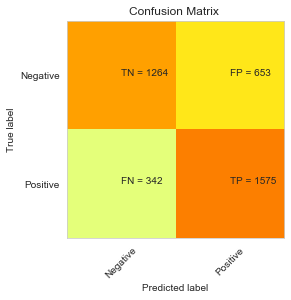

In [127]:
cm = confusion_matrix(y_test_sm, y_pred_log_t)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title( 'Confusion Matrix ')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [128]:
print(classification_report(y_test_sm, y_pred_log_t))

             precision    recall  f1-score   support

          0       0.79      0.66      0.72      1917
          1       0.71      0.82      0.76      1917

avg / total       0.75      0.74      0.74      3834



## Random Forest (Test Data)

In [129]:
ran_for_t = RandomForestClassifier(n_estimators=50, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
ran_for_t.fit(X_test_sm, y_test_sm)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [130]:
y_pred_rf_t = ran_for_t.predict(X_test_sm)


print(ran_for_t.score(X_test_sm, y_test_sm))

1.0


In [131]:
print(classification_report(y_test_sm, y_pred_rf_t))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1917
          1       1.00      1.00      1.00      1917

avg / total       1.00      1.00      1.00      3834



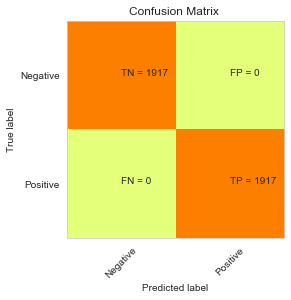

In [132]:
cm = confusion_matrix(y_test_sm, y_pred_rf_t)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title( 'Confusion Matrix ')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

## KNN (Test Data)

In [133]:
knn_t = KNeighborsClassifier(n_neighbors=4)
knn_t.fit(X_test_sm, y_test_sm)
y_pred_knn_t = knn_t.predict(X_test_sm)
print(metrics.accuracy_score(y_test_sm, y_pred_knn_t))

0.9165362545644236


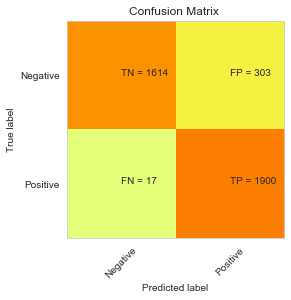

In [134]:
cm = confusion_matrix(y_test_sm, y_pred_knn_t)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title( 'Confusion Matrix ')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [135]:
print(classification_report(y_test_sm, y_pred_knn_t))

             precision    recall  f1-score   support

          0       0.99      0.84      0.91      1917
          1       0.86      0.99      0.92      1917

avg / total       0.93      0.92      0.92      3834

